In [1]:
#모듈 설치
!pip install iglovikov_helper_functions
!pip install easyocr

     |████████████████████████████████| 64 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 71.1 MB/s eta 0:00:01
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8441 sha256=89e2e8ad731892bcb27d8a269aab5d3144487b037b1bc5b84960ec466cdb531a
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b0/a5/2a/d53da97e956349ad4bbe7caae47cc4cc26c8e3ce9b80f7117a
Successfully built jpeg4py
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 63.6 MB 164 kB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 47.6 MB 50.6 MB/s eta 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.3.2
    Uninstalling Pillow-8.3.2:
      Successfully uninstalled Pillow-8.3.2
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/p

In [2]:
# 모듈 import
%matplotlib inline
from pylab import imshow
import numpy as np
import pandas as pd
import cv2
import torch
from iglovikov_helper_functions.utils.image_utils import load_rgb
import easyocr

In [3]:
data = pd.read_csv('ko_to_en.txt',names=['ko','en'])
name = np.c_[data['ko'],data['en']]
print(name)

[['김치찌개' 'Kimchi stew']
 ['된장찌개' 'soybean Paste Stew']
 ['순두부찌개' 'Spicy Soft Tofu Stew']
 ['부대찌개' 'Spicy Sausage Stew']
 ['고추장찌개' 'Red pepper paste stew']
 ['닭볶음탕' 'Braised Spicy Chicken']]


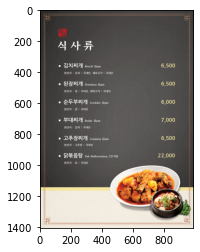

In [4]:
#이미지 업로드
image1 = load_rgb("menu.png")
imshow(image1)

In [5]:
#이미지에서 글자 인식
reader = easyocr.Reader(['ko','en'],gpu=False) # need to run only once to load model into memory
result = reader.readtext('menu.png')

Using CPU. Note: This module is much faster with a GPU.


In [6]:
#인식된 글자들 박스위치와 글자 
for one in result:
    print(one)

([[113, 189], [351, 189], [351, 275], [113, 275]], '식 사류', 0.6588601616890591)
([[146, 334], [282, 334], [282, 382], [146, 382]], '김치찌개', 0.997288167476654)
([[286, 350], [396, 350], [396, 374], [286, 374]], 'Kimchi Jjigae', 0.999297462749003)
([[778, 338], [877, 338], [877, 379], [778, 379]], '6,500', 0.8036345567640372)
([[152, 394], [206, 394], [206, 418], [152, 418]], '원산지', 0.9978934796359888)
([[222, 394], [262, 394], [262, 418], [222, 418]], '김치', 0.6186080697523141)
([[273, 391], [330, 391], [330, 418], [273, 418]], '국내산,', 0.8782138228416443)
([[337, 395], [405, 395], [405, 415], [337, 415]], '돼지고기', 0.9999728202819824)
([[418, 391], [474, 391], [474, 418], [418, 418]], '국내산', 0.9998573948944078)
([[147, 453], [281, 453], [281, 497], [147, 497]], '된장찌개', 0.9963923692703247)
([[286, 468], [418, 468], [418, 492], [286, 492]], 'Doenjang Jjigae', 0.6607982377480314)
([[779, 457], [877, 457], [877, 495], [779, 495]], '6,500', 0.9954603120660523)
([[153, 513], [205, 513], [205, 533]

In [7]:
img = image1
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(result)):
    img = cv2.rectangle(img,result[i][0][0],result[i][0][2],(255,0,0),1)
    for j in range(len(name)):
        if (result[i][1]==name[j][0]):
            cv2.putText(img,name[j][1],result[i][0][2], font, 1, (0,255,255), 2, cv2.LINE_AA)

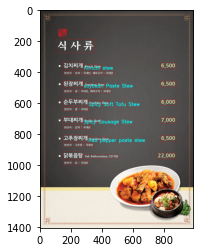

In [8]:
imshow(img)

In [9]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('result.png',rgb_img)

True